Hi Pranita! My name is Dmitry, and I will be reviewing your project.

I’ve left my comments throughout the notebook - look for green, yellow and red boxes. Please don’t delete these comments.

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Success: everything is done well</p>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Remarks: my recommendations to make the project even better</p>
</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Error: some issues need fixing!</p>
</div>

<span style="color:red"> Keep in mind that the project will be accepted only when all the “red” issues are resolved.</span>

You can add your replies or questions related to my comments using this template:
<div class="alert alert-info">
<b>Student's comment</b>
</div>

#### General feedback
- Very nice project! 
- Data preprocessing, plots and statistical analysis look great, and the presentation is quite neat, good job!
- There are just a few issues that should be fixed to make the project complete
    - The most important in my opinion is the way you obtain the parameters to calculate revenues: rather than hard-coding the numbers, you should try to automatically extract the numbers from "plans" dataframe. The motivation for this is simple: what if Megaline increases the price for messages, for example? Your code should still be able to produce correct revenues in that case, without manually changing the numbers.
    - Also, I would recommend giving more attention to introduction and general conclusion: try to make them more detailed and structured
    - There are a few other minor issues, please take a look at the comments I've left throughout the text
- Overall, I think the project is not too far from being complete!
- So, good luck! I'm looking forward to the improved version :)

***

#### <mark>General feedback - V2</mark>
- Hi again, Pranita!
- Thanks for addressing my comments to the first version. The project looks better now: you have successfully cleaned out the data with inconsisted dates, wrote a nice function for revenue calculation, and fixed other minor issues.
- However, as I was going through the project the second time, I noticed that the revenues that you computed look pretty large: people normally don't spent \\$200 - \\$400 per month on calling plans, right?
- I investigated that, and found that your approach to calculating internet usage is not entirely correct:
    - According to the task description: *For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.*
    - It seems that you have accidentally rounded up each session with `np.ceil()`.
    - No worries! That's not a very big issue - the rest of the code seems to be working correctly, and I believe you will have no troubles fixing this.
- Once you correct the revenue calculations, I think the project will be done (but don't forget to update statistical analysis and conclusions)

# Analyze prepaid call plans for Megaline

#### Project description:

We are working on a project for a telecom company called Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We are given the data of 500 clients(users): who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 

The users table (data on users):
-   user_id — unique user identifier
-   first_name — user's name
-   last_name — user's last name
-   age — user's age (years)
-   reg_date — subscription date (dd, mm, yy)
-   churn_date — the date the user stopped using the service (if the value is - -   missing, the calling plan was being used when this data was retrieved)
-   city — user's city of residence
-   plan — calling plan name

The calls table (data on calls):
-   id — unique call identifier
-   call_date — call date
-   duration — call duration (in minutes)
-   user_id — the identifier of the user making the call

The messages table (data on texts):
-    id — unique text message identifier
-    message_date — text message date
-    user_id — the identifier of the user sending the text

The internet table (data on web sessions):
-   id — unique session identifier
-   mb_used — the volume of data spent during the session (in megabytes)
-   session_date — web session date
-   user_id — user identifier

The plans table (data on the plans):
-  plan_name — calling plan name
-  usd_monthly_fee — monthly charge in US dollars
-  minutes_included — monthly minute allowance
-  messages_included — monthly text allowance
-  mb_per_month_included — data volume allowance (in megabytes)
-  usd_per_minute — price per minute after exceeding the package limits (e.g.,    if the package includes 100 minutes, the 101st minute will be charged)
-  usd_per_message — price per text after exceeding the package limits
-  usd_per_gb — price per extra gigabyte of data after exceeding the package    limits (1 GB = 1024 megabytes)
#### Steps to take:
- Step 1: Open the data file and study the general information.
- Step 2: Prepare the data 
We will view the data in more detail to convert them to the necessary types and find missing values.Find and eliminate errors in the data.
- Step 3: Analyze the data 
We will find the minutes, texts and volume of data the users of   each plan require per month and monthly revenue from each user.Also, find the mean, dipersion, and standard deviation. Plot histogram and describe the distributions
- Step 4: Test the hypotheses
  - the average revenue from users of Ultimate and Surf calling plans differs.
  - the average revenue from users in NY-NJ area is different from that of the users from other regions.
  
#### Goal:
Our goal is to help analyze clients' behavior and determine which prepaid plan brings in more revenue.









<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>Best would be to rewrite the introduction in your own words and outline the steps and goals of the analysis.</p>
</div>
<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>Looks nice!</p>
</div>

##  Step 1: Open the data file and study the general information. 

In [1]:
##### Import default libraries
import pandas as pd # manipulate and wrangle the data  
import numpy as np
import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics

from scipy import stats # for mathematics, science, and engineering
from math import ceil as math

#read data from files 
calls    = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans    = pd.read_csv('/datasets/megaline_plans.csv')
users    = pd.read_csv('/datasets/megaline_users.csv')

In [2]:
##### preview the loaded data
calls.info()

# return the top n- rows of dataframe
calls.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [3]:
# preview the loaded data
internet.info()

# return the top n- rows of dataframe
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [4]:
# preview the loaded data
messages.info()

# return the top n- rows of dataframe
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [5]:
# preview the loaded data
plans.info()

# return the top n- rows of dataframe
plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
# preview the loaded data
users.info()

# return the top n- rows of dataframe
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [6]:
# provides descriptive statistics
display(calls.describe()) 

display(internet.describe()) 

display(messages.describe()) 

display(users.describe()) 


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


#### Conclusion:

- We checked the general information of 'megaline_calls','megaline_internet','megaline_messages', 'megaline_plans'and 'megaline_users' datasets.
- Upon checking data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies. However, data types of 'id','call_date', 'duration','message_date','first_name','last_name','city','reg_date','plan','churn_date' columns need to be changed and 'city','first_name','last_name' columns are object type too and need to be changed into lowercase.
- There are 26,834 calls with zero durations which is 19% of the calls. Though these are zero minutes, there are still phone calls so we will keep them.
- There are missing values for the 'chur_date' column. chur_date' is the date that the user stopped using the service. However, the project explains it as a call plan was being used when this data was retrieved.


<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Good job! Your conclusions in this part are correct.</p>
</div>

##  Step 2: Prepare the data 
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data 




In [7]:
#converting float data numbers into integers
#converting float data numbers into date time
# changing data types for calls 

calls['id'] = calls['id'].astype('int')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].astype('int')

print(calls.dtypes)

id                    int64
user_id               int64
call_date    datetime64[ns]
duration              int64
dtype: object


In [8]:
# rounding
calls['duration'] = calls['duration'].apply(np.ceil)
print(calls)

             id  user_id  call_date  duration
0        100093     1000 2018-12-27       8.0
1       1000145     1000 2018-12-27      13.0
2       1000247     1000 2018-12-27      14.0
3       1000309     1000 2018-12-28       5.0
4       1000380     1000 2018-12-30       4.0
...         ...      ...        ...       ...
137730  1499199     1499 2018-11-21       8.0
137731  1499200     1499 2018-10-20      10.0
137732  1499201     1499 2018-09-21       8.0
137733  1499202     1499 2018-10-10       0.0
137734  1499203     1499 2018-12-29      13.0

[137735 rows x 4 columns]


In [9]:
# changing data types for messages 
messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'])

# check data types of columns
print(messages.dtypes)

id                       int64
user_id                  int64
message_date    datetime64[ns]
dtype: object


In [10]:
# changing data types for internet file
internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'])

# check data types of columns
print(internet.dtypes)

id                       int64
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


In [7]:
# rounding each web session IS NOT required per project description
# Hence, commented
#renaming 'mb_per_month_included' column to 'gb_per_month_included' in 'Internet' dataset
#internet['mb_used'] = np.ceil(internet['mb_used'] / 1024)
#internet = internet.rename(columns={'mb_used': 'gb_used'})
# check data types of columns
#print(internet.dtypes)


id                       int64
user_id                  int64
session_date    datetime64[ns]
gb_used                float64
dtype: object


<div class="alert alert-danger">
<b>Reviewer's comment - V2</b>
<p>As I mentioned in general conclusion, this way of computing internet usage is different from what is described in the task. Perhaps, you can keep the internet usage in megabytes here, and round up only after summation over all sessions in a given month.</p>
</div>

In [11]:
# renaming 'mb_per_month_included' column to 'gb_per_month_included' 

#plans['mb_per_month_included'] = np.ceil(plans['mb_per_month_included'] / 1024)
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans = plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})

# check data types of columns
print(plans.dtypes)

messages_included          int64
gb_per_month_included    float64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


In [12]:
# changing data types for users file
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
# check data types of columns
print(users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


In [23]:
calls.isnull().sum()
internet.isnull().sum()
plans.isnull().sum()
messages.isnull().sum()
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [24]:
calls.duplicated().sum()
messages.duplicated().sum()
internet.duplicated().sum()
users.duplicated().sum()

0

#### Additional preprocessing for 'churn_date' in 'users' dataset

In [13]:
# filling null churn date with '2021-12-31'

users['churn_date']=pd.to_datetime(users['churn_date'].fillna(pd.datetime.now().date().replace(month=12, day=31)))
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [38]:
user_churn = users[['user_id','churn_date']]

for ind, row in user_churn.iterrows():
    user_id = row['user_id']
    churn_date = row['churn_date']
    users.drop(users[(users['user_id'] == user_id) & (users['reg_date'] > churn_date)].index,inplace=True)
    calls.drop(calls[(calls['user_id'] == user_id) & (calls['call_date'] > churn_date)].index,inplace=True)
    messages.drop(messages[(messages['user_id'] == user_id) &(messages['message_date'] > churn_date)].index, inplace=True)
    internet.drop(internet[(internet['user_id'] == user_id) &(internet['session_date'] > churn_date)].index, inplace=True)
print(calls.info())
print(messages.info())
print(internet.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134774 entries, 0 to 137734
Data columns (total 4 columns):
id           134774 non-null int64
user_id      134774 non-null int64
call_date    134774 non-null datetime64[ns]
duration     134774 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74460 entries, 0 to 76050
Data columns (total 3 columns):
id              74460 non-null int64
user_id         74460 non-null int64
message_date    74460 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102362 entries, 0 to 104824
Data columns (total 4 columns):
id              102362 non-null int64
user_id         102362 non-null int64
session_date    102362 non-null datetime64[ns]
mb_used         102362 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int6

We did additional preprocessing for 'churn_date' in the 'users' dataset. 'churn_date' is the date the user stopped using the service. There are 466 users who are using the service (out of 500). However, it's not a good idea to keep any column null so we backfilled null 'churn_date' with the end of this year.
We also checked if there are any calls, messages, the internet used passed churn_date. If there are, then those are incorrect data and need to be dropped. The above preprocessing code is an attempt to do that.


### Conclusion:

- We changed the date columns to date types. We changed 'city', 'first_name', 'last_name' columns to string type and changed to lowercase. Also, rounded 'duration' and 'mb_used' columns.

- Also, checked for missing values in the datasets. There are 466 missing values for 'churn_date'. It's because the calling plan was being used when this data was retrieved. There are zero duration calls in the dataset as well but we are keeping all of them.

- We rounded 'duration' and 'md_used' columns.

- Also, checked for duplicate data. We didn't find any. Each row in the dataset is found to be unique.

- Also, backfilled null 'churn_date' with '2021-12-31' dates. Dropped those records in 'users', 'calls', 'messages', 'internet' datasets those 'call_date', 'message_date','session_date' date is greater than their 'churn_date' date.
- We  renamed 'mb_per_month_included' column to 'gb_per_month_included' in 'plan' dataset to keep consistency. We will be calculating internet usage in GB. We also renamed and converted 'mb_used' column to 'gb_used' in 'internet dataset.

<div class="alert alert-danger">
<b>Reviewer's comment</b>
<p>Okay, so among the things that you checked there were no issues. However, there might be problems which are not so obvious. For example, can it happen that there are calls, messages or internet sessions before registration date or after churn date?</p>
</div>
<div class="alert alert-warning">
<b>Reviewer's comment</b>
<p>And also, I would not recommend to leave missing values in churn_date column, even if it does not affect the results in this project. You can fill them with December 31st, for example.</p>
</div>
<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>Great! Now the dataset is clean from calls, messages and internet sessions that happened before registration or after churn. Perhaps, they were the calls of users who had the same phone number in the past, and the data engineers haven't done a good job cleaning it up.</p>
</div>

##  Step 3: Analyze the data 
In this step, we are finding the minutes, texts and volume of data the users of each plan require per month. Also, find the mean, dipersion, and standard deviation.


In [14]:
# Finding number of calls made and minutes spent per month for each user

calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
#extracting mth from date so that we can aggregate calls made in a month
#print(calls)

total_calls = calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum'])
total_calls.reset_index(inplace=True)
total_calls.columns = ['month', 'user_id', 'total_calls', 'total_duration']
print(total_calls.head(10))


   month  user_id  total_calls  total_duration
0      1     1042           18           100.0
1      1     1077           42           257.0
2      1     1185           23           163.0
3      1     1196           42           255.0
4      1     1214            5            14.0
5      1     1362           42           258.0
6      2     1042           37           227.0
7      2     1077          111           692.0
8      2     1099            7            35.0
9      2     1138           42           271.0


In [15]:
# Finding number of messages sent per month per user for each user

messages['month'] = pd. DatetimeIndex(messages['message_date']).month
#extracting month from date so that we can aggregate messages sent in a month

total_messages = messages. pivot_table(index=['month','user_id'], values='id', aggfunc='count')
total_messages.reset_index(inplace=True)
total_messages.columns = ['month', 'user_id', 'total_msgs']
total_messages


,month,user_id,total_msgs
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12
...,...,...,...
1801,12,1491,43
1802,12,1492,37
1803,12,1494,33
1804,12,1496,11


In [16]:
#  Finding volume of data (internet) per month per user for each user

internet['month'] = pd. DatetimeIndex(internet['session_date']). month
#extracting month from date so that we can aggregate internet usage in a month

total_internet = internet. pivot_table(index=['month','user_id'], values='mb_used', aggfunc='sum')
total_internet.reset_index(inplace=True)
total_internet.columns = ['month', 'user_id', 'total_mb_used']
total_internet

,month,user_id,total_mb_used
0,1,1042,1854.93
1,1,1077,10635.64
2,1,1185,6812.77
3,1,1196,8908.61
4,1,1214,1315.35
...,...,...,...
2272,12,1495,24097.40
2273,12,1496,16438.99
2274,12,1497,11106.55
2275,12,1498,23137.69


In [18]:
# Inorder to calculate monthyl revenue from each user, 
#we are combining calls, messages, internet usage  and users datasets together

#Calls per user per month
calls_made = calls.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'calls'})

#Minutes per user per month
min_spent = calls.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'duration'})

#Internet per user per month
#mb_used = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'mb_used'})
# Added for V2
gb_used = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'gb_used'})
gb_used['gb_used'] = np.ceil(gb_used['gb_used']/1024)

#Messages per user per month
messages_sent = messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'messages'})

#Plan for each user
user_plan = users[['user_id','plan','city']]
callplan_data = pd.concat([calls_made, min_spent, gb_used, messages_sent],axis=1)
callplan_data  = user_plan.merge(callplan_data,on='user_id')

display(callplan_data)
#callplan_data.info()

,user_id,plan,city,calls,duration,gb_used,messages
0,1000,ultimate,"atlanta-sandy springs-roswell, ga msa",16.0,108.0,2.0,11.0
1,1001,surf,"seattle-tacoma-bellevue, wa msa",27.0,160.0,7.0,30.0
2,1001,surf,"seattle-tacoma-bellevue, wa msa",49.0,278.0,14.0,44.0
3,1001,surf,"seattle-tacoma-bellevue, wa msa",65.0,348.0,22.0,53.0
4,1001,surf,"seattle-tacoma-bellevue, wa msa",64.0,379.0,19.0,36.0
...,...,...,...,...,...,...,...
2288,1498,surf,"new york-newark-jersey city, ny-nj-pa msa",39.0,308.0,23.0,NaN
2289,1499,surf,"orlando-kissimmee-sanford, fl msa",41.0,312.0,13.0,NaN
2290,1499,surf,"orlando-kissimmee-sanford, fl msa",53.0,344.0,20.0,NaN
2291,1499,surf,"orlando-kissimmee-sanford, fl msa",45.0,269.0,17.0,NaN


In [19]:
# Check for empty values 
callplan_data.isnull().sum ()

user_id       0
plan          0
city          0
calls        35
duration     35
gb_used      16
messages    487
dtype: int64

In [21]:
# Replace empty values with zero 
callplan_data  =  callplan_data.fillna(0)

<div class="alert alert-success">
<b>Reviewer's comment</b>
<p>Good job collecting all data into one dataframe!</p>
</div>

In [22]:
#plan_name = users.loc[users['user_id'] == 1000, 'plan']
#display(plan_name)
callplan_data

,user_id,plan,city,calls,duration,gb_used,messages
0,1000,ultimate,"atlanta-sandy springs-roswell, ga msa",16.0,108.0,2.0,11.0
1,1001,surf,"seattle-tacoma-bellevue, wa msa",27.0,160.0,7.0,30.0
2,1001,surf,"seattle-tacoma-bellevue, wa msa",49.0,278.0,14.0,44.0
3,1001,surf,"seattle-tacoma-bellevue, wa msa",65.0,348.0,22.0,53.0
4,1001,surf,"seattle-tacoma-bellevue, wa msa",64.0,379.0,19.0,36.0
...,...,...,...,...,...,...,...
2288,1498,surf,"new york-newark-jersey city, ny-nj-pa msa",39.0,308.0,23.0,0.0
2289,1499,surf,"orlando-kissimmee-sanford, fl msa",41.0,312.0,13.0,0.0
2290,1499,surf,"orlando-kissimmee-sanford, fl msa",53.0,344.0,20.0,0.0
2291,1499,surf,"orlando-kissimmee-sanford, fl msa",45.0,269.0,17.0,0.0


In [23]:
# calculating monthly revenue  per user per call plan

def calculate_revenue(row):
    user_id = row['user_id']
    gb_used = row['gb_used']
    messages_sent = row['messages']
    minutes_sent = row['duration']
    
    plan_type = users.loc[users['user_id'] == user_id, 'plan'].iloc[0]
    plan_detail = plans.loc[plans['plan_name'] == plan_type]
    
    minutes_included = plan_detail['minutes_included'].iloc[0]
    messages_included = plan_detail['messages_included'].iloc[0]
    gb_per_month_included = plan_detail['gb_per_month_included'].iloc[0]
       
    usd_monthly_pay = plan_detail['usd_monthly_pay'].iloc[0]
    
    usd_per_gb = plan_detail['usd_per_gb'].iloc[0]
    usd_per_message =plan_detail['usd_per_message'].iloc[0]
    usd_per_minute = plan_detail['usd_per_minute'].iloc[0]
     
    total_internet_cost = 0
    total_message_cost = 0    
    total_minute_cost = 0  
       
    if minutes_sent > minutes_included:
        total_minute_cost = (minutes_sent - minutes_included) * usd_per_minute 
    if messages_sent > messages_included:
        total_message_cost = (messages_sent - messages_included) *  usd_per_message
    if gb_used > gb_per_month_included:
        total_internet_cost = (gb_used - gb_per_month_included) *  usd_per_gb 
    
    return (total_minute_cost+total_message_cost+total_internet_cost+usd_monthly_pay)

callplan_data['revenue'] = callplan_data.apply(calculate_revenue, axis=1)
print(callplan_data)


      user_id      plan                                       city  calls  \
0        1000  ultimate      atlanta-sandy springs-roswell, ga msa   16.0   
1        1001      surf            seattle-tacoma-bellevue, wa msa   27.0   
2        1001      surf            seattle-tacoma-bellevue, wa msa   49.0   
3        1001      surf            seattle-tacoma-bellevue, wa msa   65.0   
4        1001      surf            seattle-tacoma-bellevue, wa msa   64.0   
...       ...       ...                                        ...    ...   
2288     1498      surf  new york-newark-jersey city, ny-nj-pa msa   39.0   
2289     1499      surf          orlando-kissimmee-sanford, fl msa   41.0   
2290     1499      surf          orlando-kissimmee-sanford, fl msa   53.0   
2291     1499      surf          orlando-kissimmee-sanford, fl msa   45.0   
2292     1499      surf          orlando-kissimmee-sanford, fl msa   65.0   

      duration  gb_used  messages  revenue  
0        108.0      2.0      1

### Conclusion:

We calculated monthly revenue for each user by merging the calls, messages, internet usage and users datasets together. Now, our data is combined with all  user usage columns and revenue.

<div class="alert alert-danger">
<b>Reviewer's comment</b>
    <p>So, I have a few comments here:
        <ul>
            <li>First, as I mentioned, it's not a good idea to hard-code the parameters of the plans. Try to extract them automatically from the "plans" dataframe.</li>
            <li>Then, I guess it's a typo in variable name, but we have cost per GB in the "plans" table, not per MB</li>
            <li>The function that computes revenue for SURF and ULTIMATE plans is exactly the same, just with different parameters - so it's better to implement it as one function (you have "plan" variable associated with each user, so you can use it to select the plan within the function)</li>
            <li>Finally, once you implement the revenue calculation as one function, there will be not much motivation to split "callplan_data" into "callplan_data_forsurf" and "callplan_data_forultimate" anymore - you can keep operating the same original dataframe (compute revenue for all users at once, automatically), and just slice when you really need it</li>
        </ul>   
    </p>
</div>
<div class="alert alert-success">
<b>Reviewer's comment - V2</b>
<p>Great, now the revenue calculation looks more concise and automated.
    
Some alternative ways of extracting the data from a table cell:

    plan_detail = plans.loc[plans['plan_name'] == plan_type].reset_index()
    minutes_included = plan_detail.loc[0, 'minutes_included']

or

    minutes_included = plans.loc[plans['plan_name'] == plan_type, 'minutes_included'].values[0]

but your approach works too!
    </p>
</div>

In [24]:
# calculate the average number, variance and standard deviation.
# SURF plan
#applying calculate_revenue_for_surf function to calculate revenue
surf_data = callplan_data.query('plan =="surf"')
#display(surf_data)

for column in surf_data[['calls','duration','messages','gb_used','revenue']]:
    
    print('Mean {}: {:.2f}'. format(column,surf_data[column]. mean()))
    
    print('Median {}: {:.2f}'. format(column,surf_data[column]. median()))
    
    print('Variance {}: {:.2f}'. format(column,np. var(surf_data[column])))
    
    print('Standard Deviation {}: {:.2f} \n'. format(column, np. std(surf_data[column])))



Mean calls: 59.81
Median calls: 60.00
Variance calls: 1024.50
Standard Deviation calls: 32.01 

Mean duration: 381.03
Median duration: 378.00
Variance duration: 43700.23
Standard Deviation duration: 209.05 

Mean messages: 31.16
Median messages: 24.00
Variance messages: 1126.01
Standard Deviation messages: 33.56 

Mean gb_used: 16.67
Median gb_used: 17.00
Variance gb_used: 61.54
Standard Deviation gb_used: 7.85 

Mean revenue: 59.99
Median revenue: 40.00
Variance revenue: 3039.02
Standard Deviation revenue: 55.13 



<div class="alert alert-warning">
<b>Reviewer's comment</b>
    <p>As a general rule: if you find yourself repeating the same lines of code multiple times, it's very likely that you can automate it with a function or a loop.
    </p>
</div>

In [25]:
# calculate the average number, variance and standard deviation.
# ULTIMATE plan
ultimate_data = callplan_data.query('plan =="ultimate"')
#display(ultimate_data)
#ultimate_data.info()

for column in ultimate_data[['calls','duration','messages','gb_used','revenue']]:
    
    print('Mean {}: {:.2f}'. format(column,ultimate_data[column]. mean()))
    
    print('Median {}: {:.2f}'. format(column,ultimate_data[column]. median()))
    
    print('Variance {}: {:.2f}'. format(column,np. var(ultimate_data[column])))
    
    print('Standard Deviation {}: {:.2f} \n'. format(column, np. std(ultimate_data[column])))



Mean calls: 60.63
Median calls: 61.00
Variance calls: 1103.56
Standard Deviation calls: 33.22 

Mean duration: 382.29
Median duration: 375.00
Variance duration: 45874.21
Standard Deviation duration: 214.18 

Mean messages: 37.55
Median messages: 30.00
Variance messages: 1207.08
Standard Deviation messages: 34.74 

Mean gb_used: 17.31
Median gb_used: 17.00
Variance gb_used: 58.75
Standard Deviation gb_used: 7.66 

Mean revenue: 72.31
Median revenue: 70.00
Variance revenue: 129.67
Standard Deviation revenue: 11.39 



### Conclusion:

- On average, people on surf plan make 60 calls that sum up to 381 minutes and 31 messages sent and 17 GB of data per month while people on the ultimate call plan make 61 calls that sum up to 382 minutes and 38 messages and use 17 GB of data per month. The usage of the call plans is not significantly different. Both the call plans have similar patterns. However, the Ultimate plan is generating more revenue than Surf. The average revenue for the surf plan is 59.99 whereas for the ultimate plan is 72.31.
- Let's see if the std deviation of calls, minutes, messages, internet usage, and mb_used could give us any more insights to figure out which plan is better. Based on these parameters, we didn't find much difference in numbers. Based on the finding above, we can say that both the call plans have similar behaviors.
- Let's further investigate and see if we could compare these two plans better with histograms and test with the hypothesis.


#### Plot histograms and describe distributions

Text(0.5, 0, 'Total_calls')

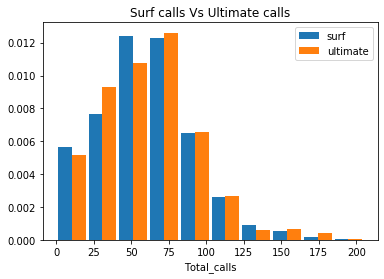

In [27]:
plt.hist([surf_data['calls'],ultimate_data['calls']],label= ['surf','ultimate'],density = True,bins = 10,rwidth = 0.9)
plt.title('Surf calls Vs Ultimate calls')
plt.legend()
plt.xlabel('Total_calls')


<div class="alert alert-warning">
<b>Reviewer's comment</b>
    <p>Just nitpicking here, but breaking the line before a comma looks a little weird and doesn't comply with any styling guidelines 😅
        
It's definitely better to start a new line after a comma, not before.
    </p>
</div>

### Conclusion:
Both the call plans have a similar pattern and the distribution looks normal. The only difference we could notice is that surf bars are longer than ultimate. It's probably because the sample dataset of the surf plan has more users than ultimate. The plotted histogram is skewed to the right and is centered around 60.

Text(0.5, 0, 'Total_messages')

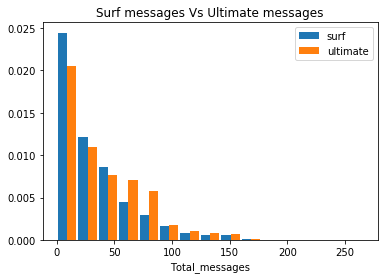

In [28]:
plt.hist([surf_data['messages']
          ,ultimate_data['messages']]
          ,label= ['surf','ultimate']
          ,density = True
          ,bins = 15
          ,rwidth = 0.9
        )
plt.title('Surf messages Vs Ultimate messages')
plt.legend()
plt.xlabel('Total_messages')

### Conclusion:
The plotted histograms for both plans follow a similar pattern as well and is skewed to the right. Just like the total_calls histogram, the total_messages histogram also shows higher values(bars) than the ultimate. However, both plans have fewer users after crossing 100 total_messages per month.

Text(0.5, 0, 'Total_internet_usage')

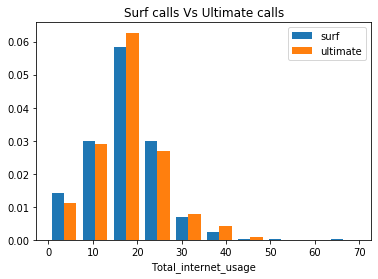

In [29]:
# importing libraries
import matplotlib.pyplot as plt

plt.hist([surf_data['gb_used'],ultimate_data['gb_used']],label= ['surf','ultimate']
         , density = True)
plt.title('Surf calls Vs Ultimate calls')
plt.legend()
plt.xlabel('Total_internet_usage')

### Conclusion:
The plotted histogram is skewed to the right and is centered at 50GB. This plot is close to being a normal distribution. This histogram also follows a similar pattern to the ones above. Both plans have fewer internet usage users after crossing 80GB.


<div class="alert alert-success">
<b>Reviewer's comment</b>
    <p>Nice plots, overall! To make them absolutely perfect, you can label the axes without underscores, just with regular words, i.e. "Total internet usage"
    </p>
</div>

## Step 4: Test the hypotheses
 #### FInd the average revenue from users of Ultimate and Surf calling plans differs.


Let’s take a look at the steps for testing this hypothesis. We start with the null hypothesis H₀ which is the average revenue from users of Ultimate and Surf calling plans does not differ. The alternative hypothesis, H₁ is the average revenue from users of Ultimate and Surf calling plans to differ. For this, we will use an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.


In [30]:
# The average revenue from users of Ultimate and Surf calling plans differs

surf_mean = surf_data['revenue'].mean()
surf_std = surf_data['revenue'].std()
print('surf mean and std is',surf_mean,surf_std)
ultimate_mean = ultimate_data['revenue'].mean()
ultimate_std = ultimate_data['revenue'].std()
print('ultimate mean and std is',ultimate_mean,ultimate_std)


surf mean and std is 59.994094087730446 55.1448663303453
ultimate mean and std is 72.31388888888888 11.395107965742119


In [31]:
from scipy import stats as st
alpha = 0.05 # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(surf_data['revenue'], ultimate_data['revenue'],equal_var = False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
        print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

p-value: 4.7715386491013573e-17
We reject the null hypothesis


<div class="alert alert-warning">
<b>Reviewer's comment</b>
    <p>Please keep in mind that st.ttest_ind by default assumes that variances of the datasets are equal - see euqal_var argument <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html"> here </a>. If the variances are very different, it should be set to False.
    </p>
</div>


### Conclusion:

This result implies that the average revenue from users of Ultimate and Surf calling plans differs.



 #### FInd the average revenue from users in NY-NJ area is different from that of the users from other regions.

Let’s take a look at the steps for testing another hypothesis. We start with the null hypothesis H₀ which is 'The average profit from users in NY-NJ area is not different from that of the users from other regions'. The alternative hypothesis, H₁ is 'The average profit from users in NY-NJ area is different from that of the users from other regions'.

For this, we will use an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.

We will have to use a t-test to test if there is a difference.

In [32]:
#The average revenue from users in NY-NJ area is different from that of the users from other regions.
user_data_NY_NJ = callplan_data.query('city == "new york-newark-jersey city, ny-nj-pa msa"')
user_data_not_NY_NJ = callplan_data.query('city != "new york-newark-jersey city, ny-nj-pa msa"')

user_data_NY_NJ_mu = user_data_NY_NJ['revenue'].mean().round(decimals=2)
user_data_not_NY_NJ_mu = user_data_not_NY_NJ['revenue'].mean().round(decimals=2)
user_data_NY_NJ_std = user_data_NY_NJ['revenue'].std().round(decimals=2)
user_data_not_NY_NJ_std = user_data_not_NY_NJ['revenue'].std().round(decimals=2)

print('Surf users with mean and std from NY-NJ: ', user_data_NY_NJ_mu,user_data_NY_NJ_std)

print('Surf users with mean and std from other regions: ', user_data_not_NY_NJ_mu,user_data_not_NY_NJ_std)



Surf users with mean and std from NY-NJ:  59.34 43.41
Surf users with mean and std from other regions:  64.75 47.0


As of now, the revenue of call plans is not dependent on regions. Let's dig in more.

In [33]:
alpha = .05 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        user_data_NY_NJ['revenue'], 
        user_data_not_NY_NJ['revenue'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print('We reject the null hypothesis')
else:
        print('We can not reject the null hypothesis')

p-value:  0.038576783178412365
We reject the null hypothesis


### Conclusion:

This concludes that the average revenue from users in the NY-NJ area is different from that of the users from other regions which means users from big metropolitan cities bring in  more revenue than other regions regardless of the type of call plans they choose.


<div class="alert alert-success">
<b>Reviewer's comment</b>
    <p>Overall, that is quite good statistical analysis! Please don't forget to update your conclusions if they change after you edin the project.
    </p>
</div>

##  Step 5: Overall conclusion

We verified our 'users', 'plans', 'calls', 'messages', 'internet' datasets, renamed some columns, checked for missing values, changed data types, and checked data against 'churn_date' as our preprocessing step. Then,  we calculated the mean, variance, standard variation of calls made, minutes spent, message spent, and internet usage for each user per month and calculated the revenue to analyze which one is profitable. We also tested the hypothesis to make sure if the revenue of the 'Surf' and 'Ultimate' plans varies or not. We also checked if the revenue from users in big metropolitan cities like NJ and NY varies with call plans.

The average monthly revenue made from Surf plan users is 59.99 whereas Ultimate users is 72.31. Hence, the mean revenue of Ultimate plan is more than Surf plan. So, we can conclude that Ultimate is a more revenue-generating plan. 
Megaline should adjust the advertising budget more towards the Ultimate plan.

We think, Surf also has potential to bring in more revenue as there's not much difference in mean total calls, minutes spent, messages sent, and internet usage when compared against Surf plan. Surf plan has a cheaper monthly charge than the Ultimate plan Hence, more people can afford it. Hence, there's not much behavioral difference between these two users plan. 

However, one thing we noticed based on the above hypothesis test is that big metropolitan cities bring in more revenue than other cities regardless of the type of call plans they choose. So, Megaline should adjust more advertising budget to promote the Ultimate plan to metropolitan cities (NY and NJ) whereas Surf plans to other regions. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
    <p>For a better conclusion, I would recommend listing the steps that you have done in the analysis, as well as give some of the most important numbers to support your conclusions.
    </p>
</div>